<a href="https://colab.research.google.com/github/AlanFirmino2024/teste/blob/main/main_1809.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto da disciplina de Tópicos em projetos 4

## Aluno: Alan Firmino da Silva

## 1. Definição do Problema

O dataset usado neste projeto será o **Pima Indians Diabetes**, proveniente originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. Seu objetivo é prever se um paciente tem ou não diabetes, com base em certas medidas de diagnóstico médico. Este dataset é um subconjunto do dataset original e aqui, todos os pacientes são mulheres com pelo menos 21 anos de idade e de herança indígena Pima.


**Informações sobre os atributos:**


**Ano**: Representa o ano em que os dados foram coletados ou a que eles se referem (2019–2024, nesse caso).

**Trimestre**: Representa o trimestre do ano (1 = janeiro a março, 2 = abril a junho, e assim por diante).

**ID_origem**: Um identificador numérico para o mercado da primeira cidade (cidade de origem).

**ID_destino**: Um identificador numérico para o mercado da segunda cidade (cidade de destino).

**origem**: Nome da primeira cidade (cidade de origem) de onde os passageiros partiram.

**destino**: Nome da segunda cidade (cidade de destino) para onde os passageiros viajaram.

**ID_Aeroporto_origem**: Um identificador numérico único para o aeroporto da primeira cidade.

**ID_Aeroporto_destino**: Um identificador numérico único para o aeroporto da segunda cidade.

**Aeroporto_origem**: Nome do aeroporto na primeira cidade (cidade de origem).

**Aeroporto_destino**: Nome do aeroporto na segunda cidade (cidade de destino).

**Distancia**: A distância entre os dois aeroportos (cidade de origem e destino) em milhas náuticas.

**Passageiros**: O número de passageiros que viajaram entre os dois aeroportos durante o período especificado.

**Tarifa**: O preço médio da passagem aérea paga pelos passageiros na rota entre as duas cidades.

**Companhia_Principal**: O código ou nome da principal companhia aérea que opera a rota, ou seja, a empresa com a maior participação de mercado.

**Perc_Mercado_Principal**: A participação de mercado da companhia aérea principal na rota, geralmente expressa em percentual.

**Tarifa_Principal**: O preço médio das passagens da companhia aérea principal na rota.

**Companhia_Baixo_Custo**: O código ou nome de uma companhia aérea de baixo custo que opera na rota.

**Perc_Mercado_Baixo_Custo**: A participação de mercado da companhia aérea de baixo custo na rota.

**Tarifa_Baixo_Custo**: O preço médio das passagens da companhia aérea de baixo custo na rota.


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv sem cabeçalho disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.

In [ ]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/AlanFirmino2024/projeto_cd/refs/heads/main/US%20Airline%202019%20-%202024.csv"

# Informa o cabeçalho das colunas
colunas = [
    'tbl','Ano','Trimestre','ID_Cidade_origem','ID_Cidade_destino', 'Cidade_origem', 'Cidade_destino','ID_Aeroporto_origem',
    'ID_Aeroporto_destino', 'Aeroporto_origem','Aeroporto_destino','Distancia','Passageiros','Tarifa','Companhia_Principal',
    'Perc_Mercado_Principal','Tarifa_Principal', 'Companhia_Baixo_Custo', 'Perc_Mercado_Baixo_Custo',
    'Tarifa_Baixo_Custo','Cidade_1_Geocodificada', 'Cidade_2_Geocodificada', 'tbl1apk'
]

# Lê o arquivo utilizando as colunas informadas
dataset_primary = pd.read_csv(url, names=colunas, skiprows=1, delimiter=';')

#Exclui as linhas que não vamos utilizar
dataset = dataset_primary.drop(['tbl', 'Cidade_1_Geocodificada', 'Cidade_2_Geocodificada', 'tbl1apk'], axis=1)

In [ ]:
# Excluindo as linhas que contêm valores faltantes
dataset = dataset.dropna()


In [ ]:
dataset.head()

,Ano,Trimestre,ID_Cidade_origem,ID_Cidade_destino,Cidade_origem,Cidade_destino,ID_Aeroporto_origem,ID_Aeroporto_destino,Aeroporto_origem,Aeroporto_destino,Distancia,Passageiros,Tarifa,Companhia_Principal,Perc_Mercado_Principal,Tarifa_Principal,Companhia_Baixo_Custo,Perc_Mercado_Baixo_Custo,Tarifa_Baixo_Custo
0,2019,1,32211,31703,"Las Vegas, NV","New York City, NY (Metropolitan Area)",12889,12197,LAS,HPN,2282,22,290.55,AA,0.5274,237.80,AA,0.5274,237.80
1,2019,1,32211,31703,"Las Vegas, NV","New York City, NY (Metropolitan Area)",12889,12478,LAS,JFK,2282,2342,288.40,DL,0.4908,314.09,AA,0.1820,263.15
2,2019,1,32211,32575,"Las Vegas, NV","Los Angeles, CA (Metropolitan Area)",12889,12892,LAS,LAX,236,3220,114.44,WN,0.3704,102.58,WN,0.3704,102.58
3,2019,1,32211,31703,"Las Vegas, NV","New York City, NY (Metropolitan Area)",12889,12953,LAS,LGA,2282,187,240.82,AA,0.3112,248.09,WN,0.2512,184.42
4,2019,1,32211,32575,"Las Vegas, NV","Los Angeles, CA (Metropolitan Area)",12889,12954,LAS,LGB,236,894,93.66,B6,0.6699,95.09,WN,0.3296,90.72


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [ ]:
# Mostra as dimensões do dataset
print(dataset.shape)

(39402, 19)


In [ ]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 39402 entries, 0 to 39450
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ano                       39402 non-null  int64  
 1   Trimestre                 39402 non-null  int64  
 2   ID_Cidade_origem          39402 non-null  int64  
 3   ID_Cidade_destino         39402 non-null  int64  
 4   Cidade_origem             39402 non-null  object 
 5   Cidade_destino            39402 non-null  object 
 6   ID_Aeroporto_origem       39402 non-null  int64  
 7   ID_Aeroporto_destino      39402 non-null  int64  
 8   Aeroporto_origem          39402 non-null  object 
 9   Aeroporto_destino         39402 non-null  object 
 10  Distancia                 39402 non-null  int64  
 11  Passageiros               39402 non-null  int64  
 12  Tarifa                    39402 non-null  float64
 13  Companhia_Principal       39402 non-null  object 
 14  Perc_Mercad

In [ ]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,Ano,Trimestre,ID_Cidade_origem,ID_Cidade_destino,Cidade_origem,Cidade_destino,ID_Aeroporto_origem,ID_Aeroporto_destino,Aeroporto_origem,Aeroporto_destino,Distancia,Passageiros,Tarifa,Companhia_Principal,Perc_Mercado_Principal,Tarifa_Principal,Companhia_Baixo_Custo,Perc_Mercado_Baixo_Custo,Tarifa_Baixo_Custo
0,2019,1,32211,31703,"Las Vegas, NV","New York City, NY (Metropolitan Area)",12889,12197,LAS,HPN,2282,22,290.55,AA,0.5274,237.80,AA,0.5274,237.80
1,2019,1,32211,31703,"Las Vegas, NV","New York City, NY (Metropolitan Area)",12889,12478,LAS,JFK,2282,2342,288.40,DL,0.4908,314.09,AA,0.1820,263.15
2,2019,1,32211,32575,"Las Vegas, NV","Los Angeles, CA (Metropolitan Area)",12889,12892,LAS,LAX,236,3220,114.44,WN,0.3704,102.58,WN,0.3704,102.58
3,2019,1,32211,31703,"Las Vegas, NV","New York City, NY (Metropolitan Area)",12889,12953,LAS,LGA,2282,187,240.82,AA,0.3112,248.09,WN,0.2512,184.42
4,2019,1,32211,32575,"Las Vegas, NV","Los Angeles, CA (Metropolitan Area)",12889,12954,LAS,LGB,236,894,93.66,B6,0.6699,95.09,WN,0.3296,90.72
5,2019,1,32211,32467,"Las Vegas, NV","Miami, FL (Metropolitan Area)",12889,13303,LAS,MIA,2174,669,310.33,AA,0.9425,307.86,UA,0.0299,288.05
6,2019,1,32211,32457,"Las Vegas, NV","San Francisco, CA (Metropolitan Area)",12889,13796,LAS,OAK,414,1664,126.51,WN,0.8049,133.85,NK,0.1251,89.46
7,2019,1,32211,32575,"Las Vegas, NV","Los Angeles, CA (Metropolitan Area)",12889,13891,LAS,ONT,236,335,147.81,WN,10.0000,147.81,WN,10.0000,147.81
8,2019,1,32211,33667,"Las Vegas, NV","Norfolk, VA (Metropolitan Area)",12889,13931,LAS,ORF,2154,249,217.72,F9,0.3018,107.68,F9,0.3018,107.68
9,2019,1,32211,33667,"Las Vegas, NV","Norfolk, VA (Metropolitan Area)",12889,14098,LAS,PHF,2154,21,289.91,AA,0.5979,299.07,DL,0.3810,276.86


In [ ]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,Ano,Trimestre,ID_Cidade_origem,ID_Cidade_destino,Cidade_origem,Cidade_destino,ID_Aeroporto_origem,ID_Aeroporto_destino,Aeroporto_origem,Aeroporto_destino,Distancia,Passageiros,Tarifa,Companhia_Principal,Perc_Mercado_Principal,Tarifa_Principal,Companhia_Baixo_Custo,Perc_Mercado_Baixo_Custo,Tarifa_Baixo_Custo
39441,2024,1,35412,30852,"Knoxville, TN","Washington, DC (Metropolitan Area)",15412,11278,TYS,DCA,464,184,235.68,AA,0.9463,229.01,AA,0.9463,229.01
39442,2024,1,35412,30852,"Knoxville, TN","Washington, DC (Metropolitan Area)",15412,12264,TYS,IAD,464,62,231.34,UA,0.9482,224.58,UA,0.9482,224.58
39443,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,11618,TYS,EWR,665,99,183.51,G4,0.5657,97.38,G4,0.5657,97.38
39444,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12197,TYS,HPN,665,5,332.42,AA,0.7442,310.57,AA,0.7442,310.57
39445,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12478,TYS,JFK,665,8,280.76,AA,0.5658,254.62,AA,0.5658,254.62
39446,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,LGA,665,207,278.70,DL,0.7503,287.44,AA,0.2359,248.46
39447,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,FLL,724,277,148.69,G4,0.8255,114.45,G4,0.8255,114.45
39448,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,MIA,724,70,330.19,AA,0.8057,321.92,AA,0.8057,321.92
39449,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,PIE,550,178,95.65,G4,10.0000,95.65,G4,10.0000,95.65
39450,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,15304,TYS,TPA,550,57,330.15,AA,0.5212,288.38,AA,0.5212,288.38


É sempre importante verificar o tipo do atributos do dataset, pois pode ser necessário realizar conversões. Já fizemos anteriormente com o comando info, mas vamos ver uma outra forma de verificar a natureza de cada atributo e então exibir um resumo estatístico do dataset.

In [ ]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

,0
Ano,int64
Trimestre,int64
ID_Cidade_origem,int64
ID_Cidade_destino,int64
Cidade_origem,object
Cidade_destino,object
ID_Aeroporto_origem,int64
ID_Aeroporto_destino,int64
Aeroporto_origem,object
Aeroporto_destino,object


In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,Ano,Trimestre,ID_Cidade_origem,ID_Cidade_destino,ID_Aeroporto_origem,ID_Aeroporto_destino,Distancia,Passageiros,Tarifa,Perc_Mercado_Principal,Tarifa_Principal,Perc_Mercado_Baixo_Custo,Tarifa_Baixo_Custo
count,39402.000000,39402.000000,39402.000000,39402.000000,39402.000000,39402.000000,39402.000000,39402.000000,39402.000000,39402.000000,39402.000000,39402.000000,39402.000000
mean,2021.205243,2.484036,31569.432491,32178.113700,12449.423481,13222.835871,1203.436780,328.001980,229.681410,1.436221,229.211729,1.246043,197.041025
std,1.499365,1.125221,1115.536517,1248.181735,1426.150537,1424.240846,689.712536,559.695037,78.401197,2.546941,84.158424,2.613797,75.516587
min,2019.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,148.000000,0.000000,58.000000,0.142900,58.000000,0.010000,50.400000
25%,2020.000000,1.000000,30721.000000,30977.000000,11193.000000,12197.000000,655.000000,28.000000,175.940000,0.522800,173.000000,0.203425,143.100000
50%,2021.000000,2.000000,31423.000000,32337.000000,12339.000000,13303.000000,1037.000000,120.000000,218.495000,0.700000,217.420000,0.471900,190.435000
75%,2022.000000,3.000000,32467.000000,33195.000000,13495.000000,14570.000000,1735.000000,367.000000,272.530000,0.930500,273.637500,0.890100,238.877500
max,2024.000000,4.000000,35412.000000,35628.000000,15919.000000,15919.000000,2724.000000,8301.000000,1664.000000,10.000000,1664.000000,10.000000,1664.000000


Vamos agora verificar se o dataset tem as classes balanceadas para que possamos tratar o desbalanceamento posteriormente, se necessário. Veremos que as classes 0 (não ocorrência de diabetes) e 1 (ocorrência de diabetes) estão desbalanceadas. Vamos guardar esta informação, pois possivelmente precisaremos realizar algum tipo de tratamento nas próximas etapas.

In [ ]:
# distribuição das classes
print(dataset.groupby('Trimestre').size())

Trimestre
1    10295
2     9468
3     9911
4     9728
dtype: int64


### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para cada atributo do dataset. Veremos que os atributos age, pedi e test seguem uma distribuição exponencial, e que as colunas mass e press seguem uma distribuição aproximadamente normal.

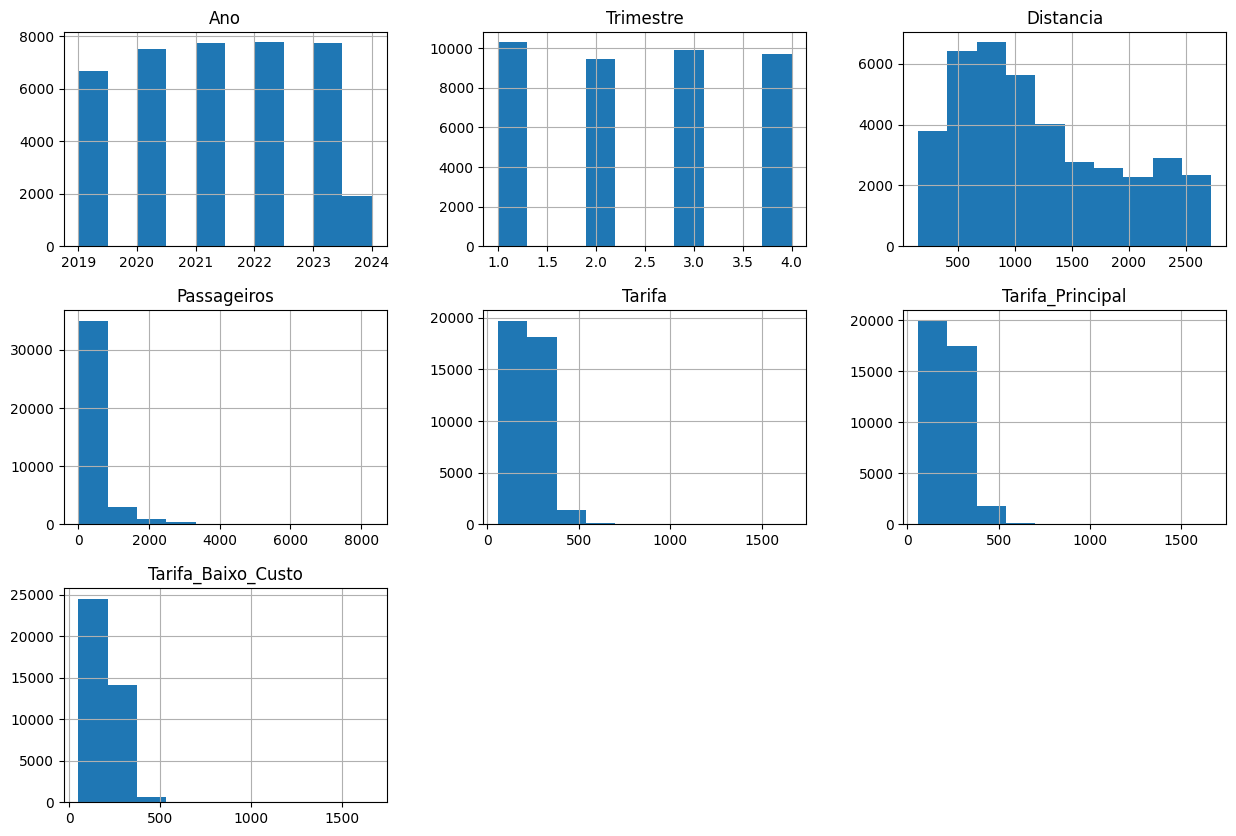

In [ ]:
# Histograma
colunas_histograma = ['Ano','Trimestre','Distancia','Passageiros','Tarifa','Tarifa_Principal','Tarifa_Baixo_Custo']
dataset[colunas_histograma].hist(figsize = (15,10))
plt.show()

O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.

Veremos que muitos dos atributos têm uma distribuição distorcida. Uma transformação como a Box-Cox, que pode aproximar a distribuição de uma Normal, pode ser útil neste caso.

In [ ]:
# Density Plot
#dataset[colunas_histograma].plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
#plt.show()

Vamos agora trabalhar com boxplots. No **boxblot**, a linha no centro (vermelha) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

*OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.*

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

In [ ]:
# Boxplot
#colunas_histograma = ['Ano','Trimestre','Distancia','Passageiros','Tarifa','Tarifa_Principal','Tarifa_Baixo_Custo']
#dataset[colunas_histograma].plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
#plt.show()

### 3.3. Visualizações Multimodais

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos

Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A **covariância** representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:
* Próximo de -1 : há uma correlação negativa entre as variáveis,
* Próximo de +1: há uma correlação positiva entre as variáveis.
* 0: não há correlação entre as variáveis.

<i>OBS: Esta informação é relevante porque alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.</i>

Falamos anteriormente da importância da correlação entre os atributos, e agora iremos visualizar esta informação em formato gráfico. A **matriz de correlação** exibe graficamente a correlação entre os atributos numéricos do dataset.estão mais distantes um do outro na ordenação.

O código a seguir exibe a matriz de correlação.

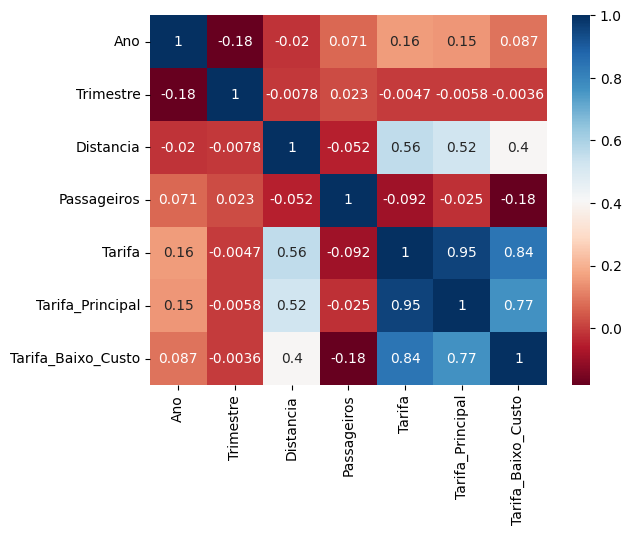

In [ ]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset[colunas_histograma].corr(), annot=True, cmap='RdBu');

Por sua vez, o gráfico de dispersão (**scatter plot**) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

In [ ]:
# Scatter Plot com Seaborn - Variação 1

#sns.pairplot(dataset[colunas_histograma])

In [ ]:
# Scatter Plot com Seaborn - Variação 2

#sns.pairplot(dataset[colunas_histograma], hue = "Tarifa", height = 2.5);

## 4. Preparação dos dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.1. Tratamento de Missings e Limpeza

Sabemos que o dataset Airplanes tem missings, mas as linhas que estão relacionadas com esses valores foram  anteriormente, para facilitar o uso. Como a quantidade de dados é relativamente grande comparando com o que foi deletado (cerca de 0,1%), isso não afetará meu resultado.

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

,0
Ano,0
Trimestre,0
ID_Cidade_origem,0
ID_Cidade_destino,0
Cidade_origem,0
Cidade_destino,0
ID_Aeroporto_origem,0
ID_Aeroporto_destino,0
Aeroporto_origem,0
Aeroporto_destino,0


In [ ]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
#col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
#atributos = dataset[col[0:-1]]

# substituindo os zeros por NaN
#atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
#ms.matrix(atributos)

### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.


In [ ]:
#Definindo o tamanho do conjunto de teste
#test_size = 0.20
#seed = 7

# Separação em conjuntos de treino e teste (dataset original)
#array = dataset_primary.values
#X_prim = array[:,0:8]
#y_prim = array[:,8]

#checar se todas as classes têm pelo menos duas amostras antes de usar a estratificação.
#if min(Counter(y_prim).values()) > 1:
    #, X_test_prim, y_train_prim, y_test_prim = train_test_split(X_prim, y_prim, test_size=test_size, shuffle=True, random_state=seed, stratify=y_prim)
#else:
    #X_train_prim, X_test_prim, y_train_prim, _prim = train_test_split(X_prim, y_prim, test_size=test_size, shuffle=True, random_state=seed)


In [ ]:
# Separação em conjuntos de treino e teste (dataset sem missings - 4 colunas a menos!)
#array = dataset.values
#X = array[:,0:6]
#y = array[:,6]
#if min(Counter(y).values()) > 1:
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y)
#else:
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed)


Erro Quadrático Médio (MSE): 3983.811374792175
Coeficiente de Determinação (R²): 0.35056259850179894


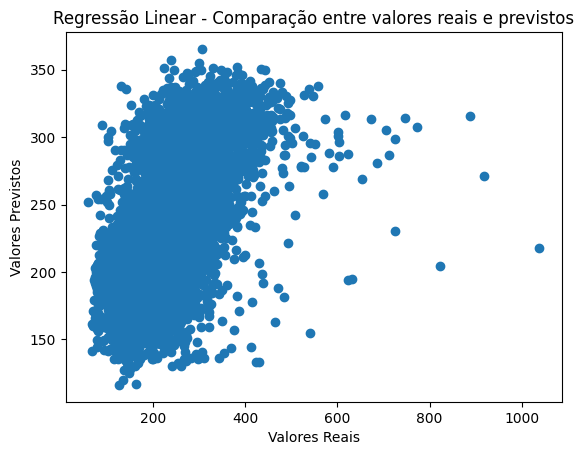

In [ ]:
# Selecionando as variáveis independentes (X) e dependente (y)
X = dataset[['Ano', 'Trimestre', 'Distancia', 'Passageiros',
             'Perc_Mercado_Principal', 'Perc_Mercado_Baixo_Custo']]
y = dataset['Tarifa']
#
#X = dataset[['Passageiros','Distancia', 'Tarifa_Principal', 'Tarifa_Baixo_Custo']]
y = dataset['Tarifa']


# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de Regressão Linear
modelo = LinearRegression()
#modelo_arvore = DecisionTreeRegressor(random_state=42)


# Treinando o modelo
modelo.fit(X_train, y_train)
#modelo_arvore.fit(X_train, y_train)


# Fazendo previsões
y_pred = modelo.predict(X_test)
#y_pred_arvore = modelo_arvore.predict(X_test)


# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#mse_arvore = mean_squared_error(y_test, y_pred_arvore)
#r2_arvore = r2_score(y_test, y_pred_arvore)


print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")

# Plotando a comparação entre os valores reais e previstos
plt.scatter(y_test, y_pred)
#plt.scatter(y_test, y_pred_arvore)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Regressão Linear - Comparação entre valores reais e previstos")
plt.show()

## Conclusão

Escreva aqui os seu principais achados, pontos de atenção e conclusões desse projeto.